# Parameterization of the metal contamination

The measured power spectrum presents clear wiggles that are caused by Lya x Silicon correlations. 
In this notebook we discuss possible parameterizations of this contamination, and choose priors for the parameters.

For now we describe the amplitude of the contamination with a power law on $(1+z)$ around $z_\star=3$.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
## Set default plot size, as normally its a bit too small
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
from cup1d.nuisance import metal_model
from cup1d.nuisance import mean_flux_model

In [2]:
X_model=metal_model.MetalModel(metal_label='SiIII')

In [3]:
for p in X_model.X_params:
    print(p.info_str())

ln_SiIII_0 = -4.509860006183767


In [4]:
X_model.get_amplitude(z=3)

0.010999999999999994

In [5]:
X_model.get_dv_kms()

2260.6866995155115

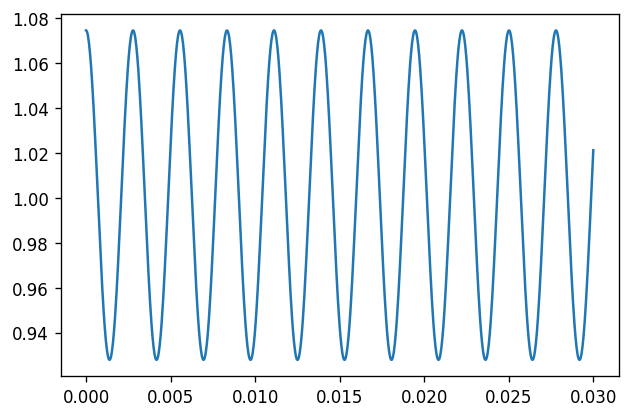

In [6]:
k_kms=np.linspace(0,0.03,1000)
cont=X_model.get_contamination(z=3, k_kms=k_kms, mF=0.7)
plt.plot(k_kms,cont)

In [7]:
# construct two models for the mean flux, with different number of parameters
X_model_test=metal_model.MetalModel(metal_label='SiIII',ln_X_coeff=[-1,np.log(0.01)])

In [8]:
mF_model=mean_flux_model.MeanFluxModel()

In [9]:
mF_model.get_mean_flux(z=3)

0.660167067771907

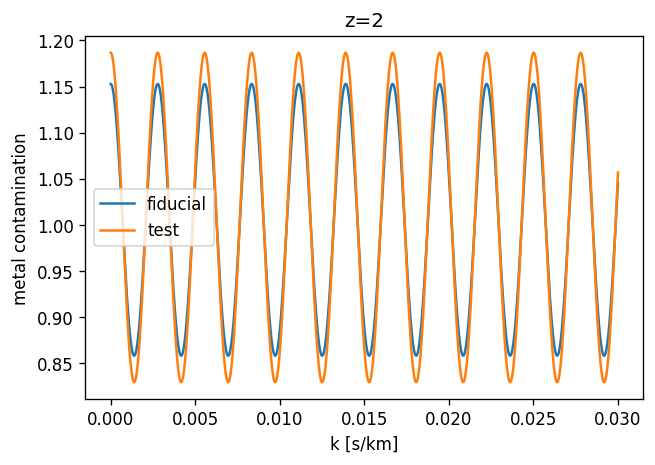

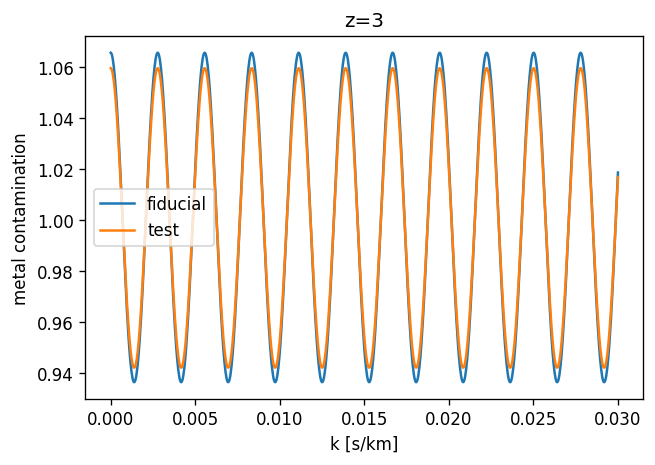

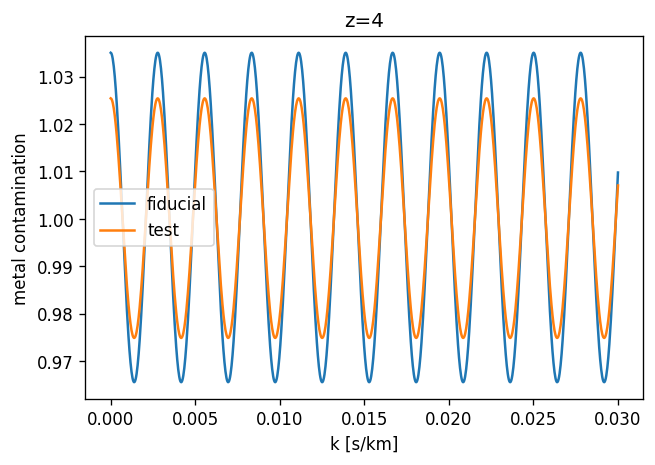

In [10]:
k_kms=np.linspace(0,0.03,1000)
for z in [2,3,4]:
    mF=mF_model.get_mean_flux(z=z)
    plt.figure()
    cont=X_model.get_contamination(z=z, k_kms=k_kms, mF=mF)
    test=X_model_test.get_contamination(z=z, k_kms=k_kms, mF=mF)
    plt.plot(k_kms,cont,label='fiducial')
    plt.plot(k_kms,test,label='test')
    plt.xlabel('k [s/km]')
    plt.ylabel('metal contamination')
    plt.title('z={}'.format(z))
    plt.legend()